## Support Vector Regressor Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[ 1.07574529,  0.63501653],
       [ 0.88016156, -0.09122761],
       [-1.29945466, -0.04931712],
       ...,
       [ 0.71192355,  1.19511473],
       [ 1.12886501,  0.23685117],
       [-1.57644279, -1.36200554]])

In [6]:
y

array([ 142.92505838,   73.01022876, -125.54594423,  193.21283439,
       -180.8013866 ,  176.10146884, -203.90358888,   11.96393945,
       -114.6542726 ,  -79.0930434 ,  -10.12051041,   37.99104599,
       -306.46240038,   24.14281152,   41.2512398 ,   11.43737225,
         51.62100108,  -33.70184563, -136.61297074,  -21.61992406,
        209.76519985, -207.32289771, -126.02258424,  -52.07268511,
        154.88224802,  108.69358401,  144.64138544, -146.87486342,
       -126.40329579,   93.0863849 , -108.03216432, -102.39102657,
         54.43162559, -102.8527519 , -135.1636828 ,  164.63744962,
         40.77919307, -135.56407344, -106.05077601,   55.56847649,
        -92.50842362,  -36.60486216,  157.27371016,  111.36184925,
        196.11870577,  -85.41477928,    3.77449472,    1.33161461,
        -28.09130505, -130.8387867 ,   21.89894452,   70.28335255,
        -72.47962586, -121.29624508,   71.75249325,   26.04862341,
        -37.34987865,   29.04104772,  -57.61578759,  192.84070

In [7]:
pd.DataFrame(X)[0]

0      1.075745
1      0.880162
2     -1.299455
3      0.991494
4     -1.661694
         ...   
995    0.389029
996    0.341200
997    0.711924
998    1.128865
999   -1.576443
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

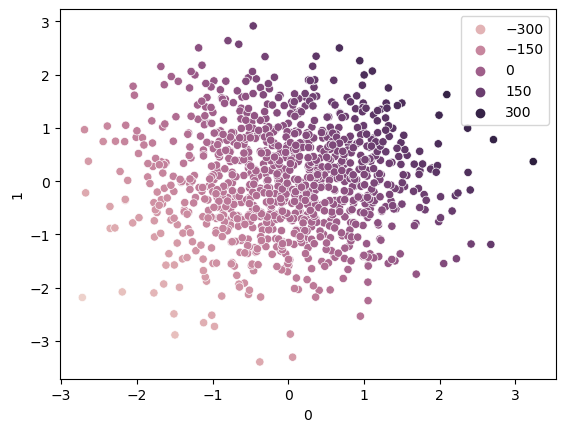

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[92.5345566 , 67.68245557]])

In [14]:
## Prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([-130.01747685, -175.03926799,   90.81582437,   -5.61693246,
        218.80848772, -129.45447851,   58.1324487 , -183.11757974,
         38.17149124,  143.56629283,  139.60301777,  118.82543685,
         29.16635213, -137.87591403,  120.29206578,  -51.87194167,
        -18.21830297,   -1.92133989,   32.51692769, -134.79061484,
        155.45208233,  132.75484895,  -19.58705742,   46.69443972,
       -105.40961719,   47.7751831 ,  -79.02997073,   38.19941167,
         85.22074168,   47.12155437,  -78.82120876,  -46.35752718,
         20.82638641, -117.48774621,   51.99951682,    1.33312047,
        199.29006783,   10.5992596 , -134.54729083,  -31.82716323,
       -150.8961683 ,  -18.61512292,   15.84116314,  -40.04199634,
         -8.3120806 , -195.49865338,  -38.68141172,  -61.98696142,
        182.56596258,  102.59512168, -146.89323311,  161.0730083 ,
         43.27971516,   45.03039628,   44.43503427,   94.20153706,
        242.65205099,   90.81061425,   -4.20959773, -126.36987

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_test,y_pred))

0.9991772755117949


## Hyperparametere Tuning With SVR

In [18]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [19]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.642 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.646 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.641 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.642 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.642 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.641 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.646 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.641 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.642 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9992024422314274
